# Check Stingray's dead time model

Here we verify that the algorithm used for dead time filtering is behaving as expected.

We also compare the results with the algorithm for paralyzable dead time, for reference.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import matplotlib as mpl

sns.set_context('talk')
sns.set_style("whitegrid")
sns.set_palette("colorblind")

mpl.rcParams['font.size'] = 18.0
mpl.rcParams['xtick.labelsize'] = 18.0
mpl.rcParams['ytick.labelsize'] = 18.0
mpl.rcParams['axes.labelsize'] = 18.0
mpl.rcParams['axes.labelsize'] = 18.0

from stingray.deadtime.filters import filter_for_deadtime

import numpy as np
np.random.seed(1209432)

## Non-paralyzable dead time

In [2]:
def simulate_events(rate, length, deadtime=2.5e-3, **filter_kwargs):
    events = np.random.uniform(0, length, np.int(rate * length))
    events = np.sort(events)
    events_dt = filter_for_deadtime(events, deadtime, **filter_kwargs)
    return events, events_dt

In [3]:
rate = 1000
length = 1000
events, events_dt = simulate_events(rate, length)
diff = np.diff(events)
diff_dt = np.diff(events_dt)

INFO: filter_for_deadtime: 714268/1000000 events rejected [stingray.deadtime.filters]


<IPython.core.display.Javascript object>


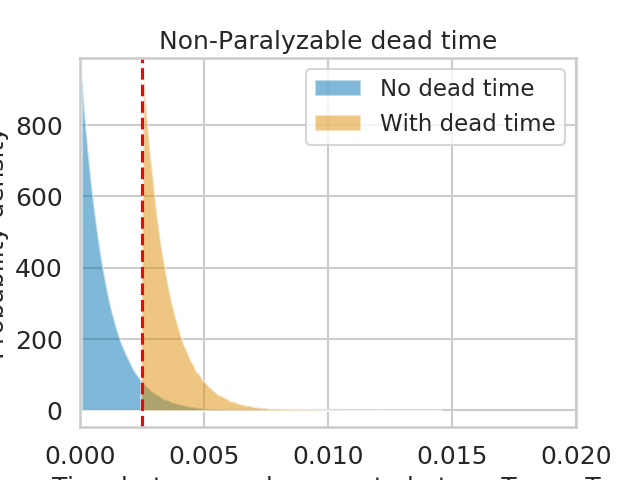

In [4]:
dt = 2.5e-3/20  # an exact fraction of deadtime
bins = np.arange(0, np.max(diff), dt)
hist = np.histogram(diff, bins=bins, density=True)[0]
hist_dt = np.histogram(diff_dt, bins=bins, density=True)[0]

bins_mean = bins[:-1] + dt/2
plt.figure()
plt.title('Non-Paralyzable dead time')

plt.fill_between(bins_mean, 0, hist, alpha=0.5, label='No dead time');
plt.fill_between(bins_mean, 0, hist_dt, alpha=0.5, label='With dead time');

plt.xlim([0, 0.02]);
# plt.ylim([0, 100]);

plt.axvline(2.5e-3, color='r', ls='--')
plt.xlabel(r'Time between subsequent photons $T_{i+1} - T_{i}$')
plt.ylabel('Probability density')

plt.legend();

Exactly as expected, the output distribution of the distance between the events follows an exponential distribution cut at 2.5 ms.

The measured rate is expected to go as 
$$r_{det} = \frac{r_{in}}{1 + r_{in}\tau_d}$$ 
(Zhang+95, eq. 29). Let's check it.

<IPython.core.display.Javascript object>


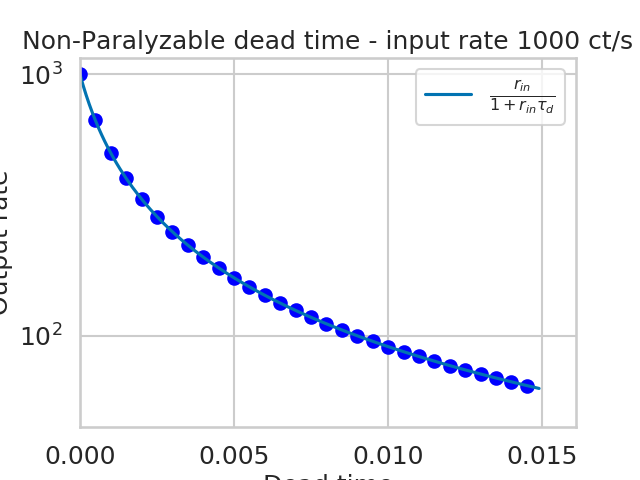

INFO: filter_for_deadtime: 333189/1000000 events rejected [stingray.deadtime.filters]
INFO: filter_for_deadtime: 499853/1000000 events rejected [stingray.deadtime.filters]
INFO: filter_for_deadtime: 600189/1000000 events rejected [stingray.deadtime.filters]
INFO: filter_for_deadtime: 666664/1000000 events rejected [stingray.deadtime.filters]
INFO: filter_for_deadtime: 714268/1000000 events rejected [stingray.deadtime.filters]
INFO: filter_for_deadtime: 750098/1000000 events rejected [stingray.deadtime.filters]
INFO: filter_for_deadtime: 777848/1000000 events rejected [stingray.deadtime.filters]
INFO: filter_for_deadtime: 800054/1000000 events rejected [stingray.deadtime.filters]
INFO: filter_for_deadtime: 818325/1000000 events rejected [stingray.deadtime.filters]
INFO: filter_for_deadtime: 833380/1000000 events rejected [stingray.deadtime.filters]
INFO: filter_for_deadtime: 846104/1000000 events rejected [stingray.deadtime.filters]
INFO: filter_for_deadtime: 857090/1000000 events rejec

In [5]:
plt.figure()
plt.title('Non-Paralyzable dead time - input rate {} ct/s'.format(rate))

deadtimes = np.arange(0, 0.015, 0.0005)
deadtimes_plot = np.arange(0, 0.015, 0.0001)

for d in deadtimes:
    events_dt = filter_for_deadtime(events, d)
    new_rate = len(events_dt) / length
    plt.scatter(d, new_rate, color='b')

plt.plot(deadtimes_plot, rate / (1 + rate * deadtimes_plot), 
         label=r'$\frac{r_{in}}{1 + r_{in}\tau_d}$')
plt.xlim([0, None])
plt.xlabel('Dead time')
plt.ylabel('Output rate')
plt.semilogy()
plt.legend();

## Paralyzable dead time

In [6]:
rate = 1000
length = 1000
events, events_dt = simulate_events(rate, length, paralyzable=True)
diff = np.diff(events)
diff_dt = np.diff(events_dt)

INFO: filter_for_deadtime: 917753/1000000 events rejected [stingray.deadtime.filters]


<IPython.core.display.Javascript object>


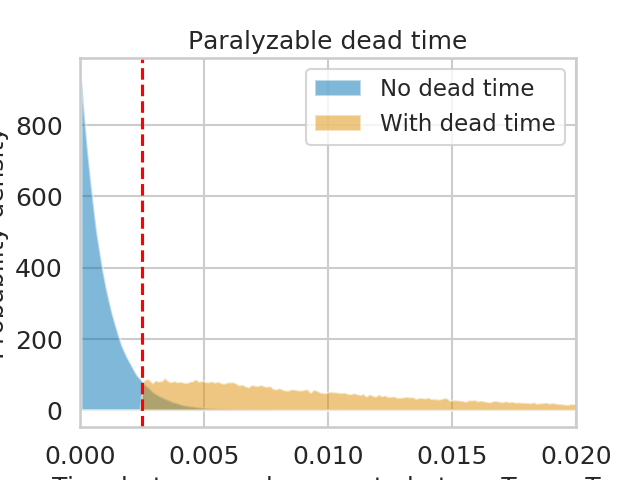

In [7]:
dt = 2.5e-3/20  # an exact fraction of deadtime
bins = np.arange(0, np.max(diff_dt), dt)
hist = np.histogram(diff, bins=bins, density=True)[0]
hist_dt = np.histogram(diff_dt, bins=bins, density=True)[0]

bins_mean = bins[:-1] + dt/2
plt.figure()
plt.title('Paralyzable dead time')
plt.fill_between(bins_mean, 0, hist, alpha=0.5, label='No dead time');
plt.fill_between(bins_mean, 0, hist_dt, alpha=0.5, label='With dead time');
plt.xlim([0, 0.02]);
# plt.ylim([0, 100]);

plt.axvline(2.5e-3, color='r', ls='--')
plt.xlabel(r'Time between subsequent photons $T_{i+1} - T_{i}$')
plt.ylabel('Probability density')

plt.legend();

Non-paralyzable dead time has a distribution for the time between consecutive counts that plateaus between $\tau_d$ and $2\tau_d$, then decreases. The exact form is complicated (e.g. )

The measured rate is expected to go as 
$$r_{det} = r_{in}e^{-r_{in}\tau_d}$$
(Zhang+95, eq. 16). Let's check it.

<IPython.core.display.Javascript object>


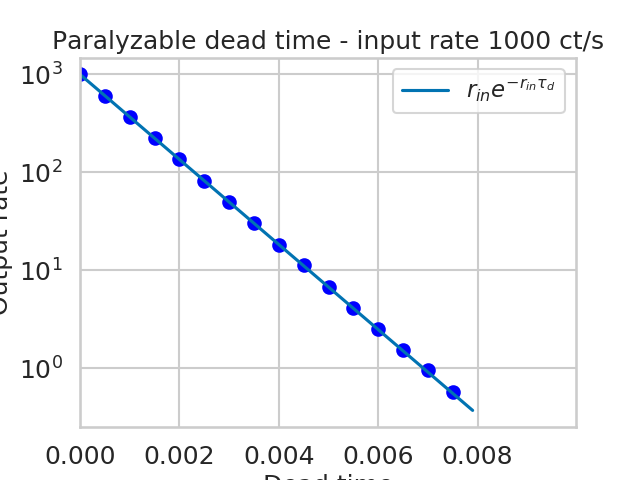

INFO: filter_for_deadtime: 393980/1000000 events rejected [stingray.deadtime.filters]
INFO: filter_for_deadtime: 631880/1000000 events rejected [stingray.deadtime.filters]
INFO: filter_for_deadtime: 776808/1000000 events rejected [stingray.deadtime.filters]
INFO: filter_for_deadtime: 864379/1000000 events rejected [stingray.deadtime.filters]
INFO: filter_for_deadtime: 917753/1000000 events rejected [stingray.deadtime.filters]
INFO: filter_for_deadtime: 950297/1000000 events rejected [stingray.deadtime.filters]
INFO: filter_for_deadtime: 969945/1000000 events rejected [stingray.deadtime.filters]
INFO: filter_for_deadtime: 981884/1000000 events rejected [stingray.deadtime.filters]
INFO: filter_for_deadtime: 988784/1000000 events rejected [stingray.deadtime.filters]
INFO: filter_for_deadtime: 993197/1000000 events rejected [stingray.deadtime.filters]
INFO: filter_for_deadtime: 995875/1000000 events rejected [stingray.deadtime.filters]
INFO: filter_for_deadtime: 997489/1000000 events rejec

In [8]:
plt.figure()
plt.title('Paralyzable dead time - input rate {} ct/s'.format(rate))

deadtimes = np.arange(0, 0.008, 0.0005)
deadtimes_plot = np.arange(0, 0.008, 0.0001)

for d in deadtimes:
    events_dt = filter_for_deadtime(events, d, paralyzable=True)
    new_rate = len(events_dt) / length
    plt.scatter(d, new_rate, color='b')

plt.plot(deadtimes_plot, rate * np.exp(-rate * deadtimes_plot), 
         label=r'$r_{in}e^{-r_{in}\tau_d}$')
plt.xlim([0, None])
plt.xlabel('Dead time')
plt.ylabel('Output rate')
plt.semilogy()
plt.legend();

Perfect.

## Periodogram - non-paralyzable

Let's see how the periodogram behaves at different intensities. Will it follow the Zhang+95 model?

<IPython.core.display.Javascript object>


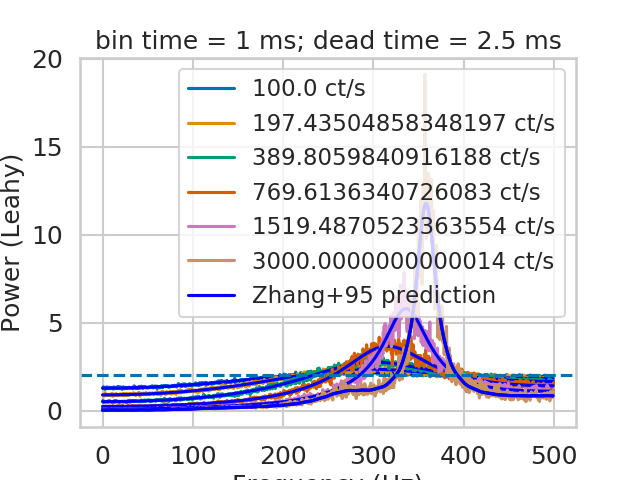

  0%|          | 0/6 [00:00<?, ?it/s]

INFO: filter_for_deadtime: 40087/200000 events rejected [stingray.deadtime.filters]


INFO:astropy:Calculating PDS model (update)


INFO: Calculating PDS model (update) [stingray.deadtime.model]


 17%|█▋        | 1/6 [00:03<00:15,  3.06s/it]INFO:astropy:filter_for_deadtime: 65885/200000 events rejected


INFO: filter_for_deadtime: 65885/200000 events rejected [stingray.deadtime.filters]


INFO:astropy:Calculating PDS model (update)
 33%|███▎      | 2/6 [00:03<00:09,  2.33s/it]INFO:astropy:filter_for_deadtime: 98718/199999 events rejected


INFO: Calculating PDS model (update) [stingray.deadtime.model]
INFO: filter_for_deadtime: 98718/199999 events rejected [stingray.deadtime.filters]


INFO:astropy:Calculating PDS model (update)
 50%|█████     | 3/6 [00:04<00:05,  1.74s/it]INFO:astropy:filter_for_deadtime: 131556/199999 events rejected


INFO: Calculating PDS model (update) [stingray.deadtime.model]
INFO: filter_for_deadtime: 131556/199999 events rejected [stingray.deadtime.filters]


INFO:astropy:Calculating PDS model (update)
 67%|██████▋   | 4/6 [00:04<00:02,  1.29s/it]INFO:astropy:filter_for_deadtime: 158309/199999 events rejected
INFO:astropy:Calculating PDS model (update)


INFO: Calculating PDS model (update) [stingray.deadtime.model]
INFO: filter_for_deadtime: 158309/199999 events rejected [stingray.deadtime.filters]
INFO: Calculating PDS model (update) [stingray.deadtime.model]


 83%|████████▎ | 5/6 [00:04<00:00,  1.04it/s]INFO:astropy:filter_for_deadtime: 176454/200000 events rejected
INFO:astropy:Calculating PDS model (update)
100%|██████████| 6/6 [00:04<00:00,  1.29it/s]

INFO: filter_for_deadtime: 176454/200000 events rejected [stingray.deadtime.filters]
INFO: Calculating PDS model (update) [stingray.deadtime.model]


In [9]:
from stingray.lightcurve import Lightcurve
from stingray.powerspectrum import AveragedPowerspectrum
import tqdm
import stingray.deadtime.model as dz
from stingray.deadtime.model import A, check_A, check_B

nevents = 200000

rates = np.logspace(2, np.log10(3000), 6)
bintime = 0.001
deadtime = 2.5e-3

plt.figure()
plt.title(f'bin time = 1 ms; dead time = 2.5 ms')
for r in tqdm.tqdm(rates):
    label = f'{r} ct/s'
    length = nevents / r

    events, events_dt = simulate_events(r, length)
#     lc = Lightcurve.make_lightcurve(events, 1/4096, tstart=0, tseg=length)
    lc_dt = Lightcurve.make_lightcurve(events_dt, bintime, tstart=0, tseg=length)
    pds = AveragedPowerspectrum(lc_dt, 2, norm='leahy')
    plt.plot(pds.freq, pds.power, label=label)

    zh_f, zh_p = dz.pds_model_zhang(1000, r, deadtime, bintime)
    plt.plot(zh_f, zh_p, color='b')
plt.plot(zh_f, zh_p, color='b', label='Zhang+95 prediction')
plt.axhline(2, ls='--')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (Leahy)')
plt.legend();

<IPython.core.display.Javascript object>


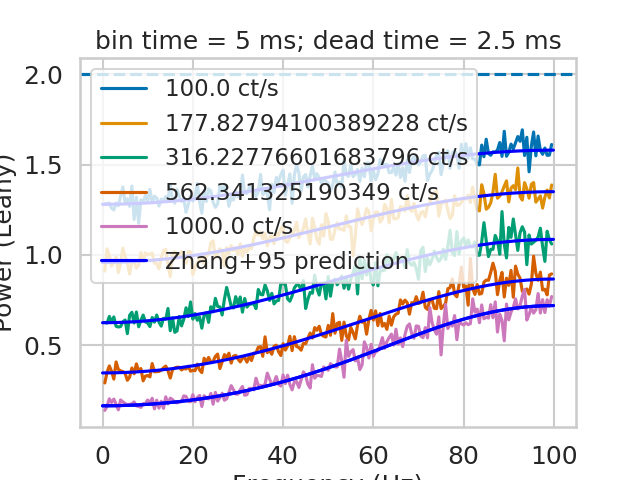

  0%|          | 0/5 [00:00<?, ?it/s]INFO:astropy:filter_for_deadtime: 40018/200000 events rejected


INFO: filter_for_deadtime: 40018/200000 events rejected [stingray.deadtime.filters]


INFO:astropy:Calculating PDS model (update)


INFO: Calculating PDS model (update) [stingray.deadtime.model]


 20%|██        | 1/5 [00:06<00:26,  6.66s/it]INFO:astropy:filter_for_deadtime: 61447/199999 events rejected


INFO: filter_for_deadtime: 61447/199999 events rejected [stingray.deadtime.filters]


INFO:astropy:Calculating PDS model (update)


INFO: Calculating PDS model (update) [stingray.deadtime.model]


 40%|████      | 2/5 [00:12<00:19,  6.55s/it]INFO:astropy:filter_for_deadtime: 88368/200000 events rejected


INFO: filter_for_deadtime: 88368/200000 events rejected [stingray.deadtime.filters]


INFO:astropy:Calculating PDS model (update)


INFO: Calculating PDS model (update) [stingray.deadtime.model]


 60%|██████    | 3/5 [00:19<00:12,  6.44s/it]INFO:astropy:filter_for_deadtime: 116821/200000 events rejected
INFO:astropy:Calculating PDS model (update)


INFO: filter_for_deadtime: 116821/200000 events rejected [stingray.deadtime.filters]
INFO: Calculating PDS model (update) [stingray.deadtime.model]


 80%|████████  | 4/5 [00:25<00:06,  6.32s/it]INFO:astropy:filter_for_deadtime: 142837/200000 events rejected
INFO:astropy:Calculating PDS model (update)


INFO: filter_for_deadtime: 142837/200000 events rejected [stingray.deadtime.filters]
INFO: Calculating PDS model (update) [stingray.deadtime.model]


100%|██████████| 5/5 [00:31<00:00,  6.23s/it]


In [10]:
from stingray.lightcurve import Lightcurve
from stingray.powerspectrum import AveragedPowerspectrum
import tqdm

nevents = 200000

rates = np.logspace(2, 3, 5)
deadtime = 2.5e-3
bintime = 2 * deadtime


plt.figure()
plt.title(f'bin time = 5 ms; dead time = 2.5 ms')
for r in tqdm.tqdm(rates):
    label = f'{r} ct/s'
    length = nevents / r

    events, events_dt = simulate_events(r, length)
#     lc = Lightcurve.make_lightcurve(events, 1/4096, tstart=0, tseg=length)
    lc_dt = Lightcurve.make_lightcurve(events_dt, bintime, tstart=0, tseg=length)
    pds = AveragedPowerspectrum(lc_dt, 2, norm='leahy')
    plt.plot(pds.freq, pds.power, label=label)

    zh_f, zh_p = dz.pds_model_zhang(2000, r, deadtime, bintime)
    plt.plot(zh_f, zh_p, color='b')
plt.plot(zh_f, zh_p, color='b', label='Zhang+95 prediction')

plt.axhline(2, ls='--')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (Leahy)')

plt.legend();

It will.

## Reproduce Zhang+95 power spectrum? (extra check)

<IPython.core.display.Javascript object>


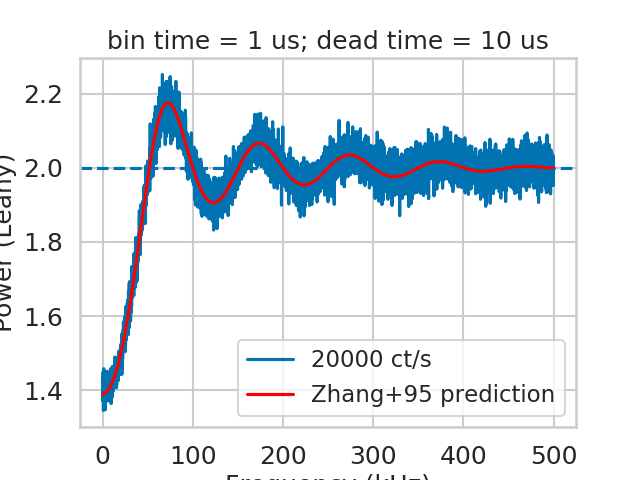

INFO:astropy:filter_for_deadtime: 133583/800000 events rejected


INFO: filter_for_deadtime: 133583/800000 events rejected [stingray.deadtime.filters]


INFO:astropy:Calculating PDS model (update)


INFO: Calculating PDS model (update) [stingray.deadtime.model]


In [11]:
from stingray.lightcurve import Lightcurve
from stingray.powerspectrum import AveragedPowerspectrum
import tqdm

bintime = 1e-6
deadtime = 1e-5
length = 40
fftlen = 0.01

plt.figure()
plt.title(f'bin time = 1 us; dead time = 10 us')

r = 20000
label = f'{r} ct/s'

events, events_dt = simulate_events(r, length, deadtime=deadtime)
#     lc = Lightcurve.make_lightcurve(events, 1/4096, tstart=0, tseg=length)
lc_dt = Lightcurve.make_lightcurve(events_dt, bintime, tstart=0, tseg=length)
pds = AveragedPowerspectrum(lc_dt, fftlen, norm='leahy')
plt.plot(pds.freq / 1000, pds.power, label=label, drawstyle='steps-mid')

zh_f, zh_p = dz.pds_model_zhang(2000, r, deadtime, bintime)
plt.plot(zh_f / 1000, zh_p, color='r', label='Zhang+95 prediction', zorder=10)
plt.axhline(2, ls='--')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Power (Leahy)')
plt.legend();

Ok.

An additional note on the Zhang model: it is a numerical model, with multiple nested summations that are prone to numerical errors. The assumptions made in the Zhang paper (along the line of "in practice the number of terms needed is very small…") are assuming the case of RXTE, where 1/dead time was low with respect to the incident rate. This is true in the simulation in figure 4 of Zhang+95: 20,000 ct/s incident rate, 1/dead time = 100,000. However, this is not true in NuSTAR, depicted in our simulation below where the incident rate (2,000) is much larger than 1/dead time (400). A thorough estimate of the needed level of detail (that implies increasing the number of summed terms) versus increase of numerical errors has to be done. This is a quite long procedure, and I did not go into so much detail. This is the reason of the “wiggles” that can be seen in the model in red in the plot below.


<IPython.core.display.Javascript object>


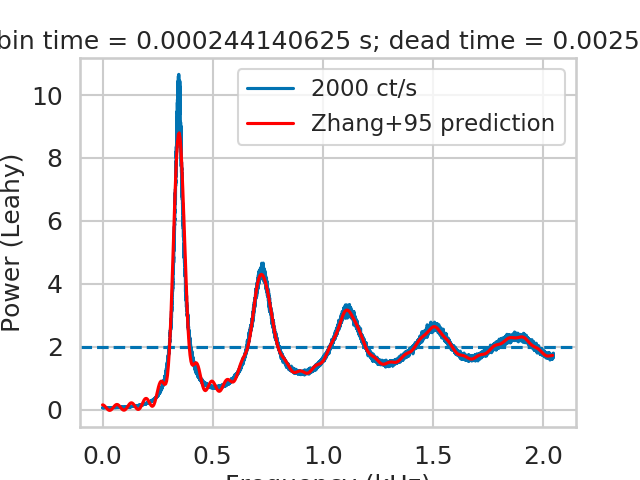

INFO:astropy:filter_for_deadtime: 13333291/16000000 events rejected


INFO: filter_for_deadtime: 13333291/16000000 events rejected [stingray.deadtime.filters]


INFO:astropy:Calculating PDS model (update)


INFO: Calculating PDS model (update) [stingray.deadtime.model]


In [12]:
bintime = 1/4096
deadtime = 2.5e-3
length = 8000
fftlen = 5
r = 2000

plt.figure()

plt.title(f'bin time = {bintime} s; dead time = {deadtime} s')

label = f'{r} ct/s'

events, events_dt = simulate_events(r, length, deadtime=deadtime)
#     lc = Lightcurve.make_lightcurve(events, 1/4096, tstart=0, tseg=length)
lc_dt = Lightcurve.make_lightcurve(events_dt, bintime, tstart=0, tseg=length)
pds = AveragedPowerspectrum(lc_dt, fftlen, norm='leahy')
plt.plot(pds.freq / 1000, pds.power, label=label, drawstyle='steps-mid')

zh_f, zh_p = dz.pds_model_zhang(1000, r, deadtime, bintime)
plt.plot(zh_f / 1000, zh_p, color='r', label='Zhang+95 prediction', zorder=10)
plt.axhline(2, ls='--')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Power (Leahy)')
plt.legend();

The script `check_A` checks visually the number of `k`s to calculate before going to the approximate value `r0**2*tb**2`. The default is 60, but in this case the presence of additional modulation for k=60 tells us that we need to increase the limit of calculated `A_k` to at least 150.
The script `check_B` does this for another important quantity in the model.

Somewhat counter-intuitively, there might be cases where too _high_ values of k could produce numerical errors. Always run `check_A` and `check_B` to test it.

<IPython.core.display.Javascript object>


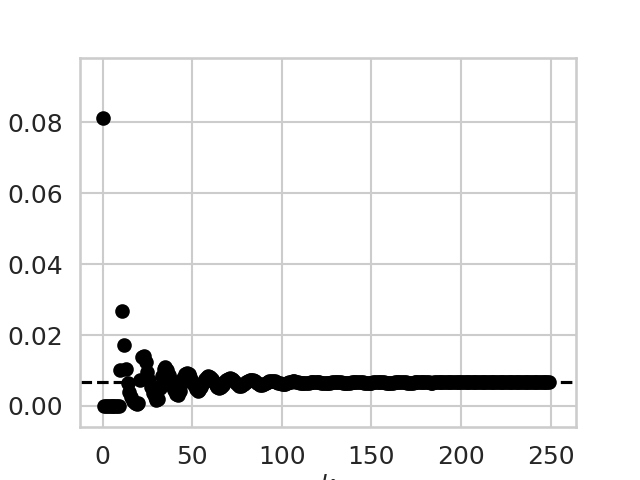

In [20]:
def safe_A(k, r0, td, tb, tau, limit=60):
    if k > limit:
        return r0 ** 2 * tb**2
    return A(k, r0, td, tb, tau)


check_A(r, deadtime, bintime, max_k=250)

So, we had better repeat the procedure by using `limit_k=150` this time.

<IPython.core.display.Javascript object>


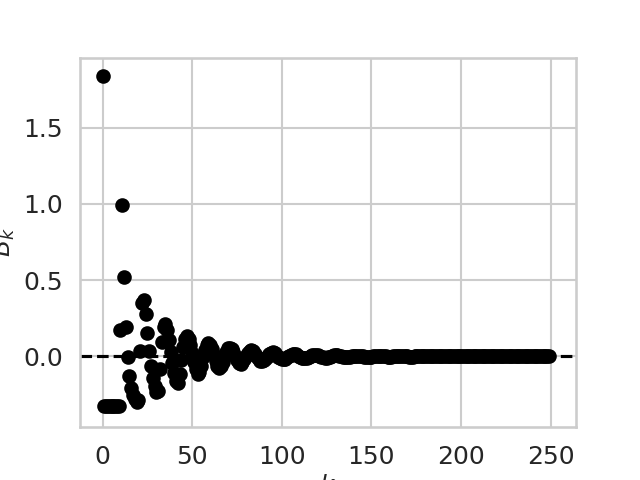

In [21]:
check_B(r, deadtime, bintime, max_k=250)

<IPython.core.display.Javascript object>


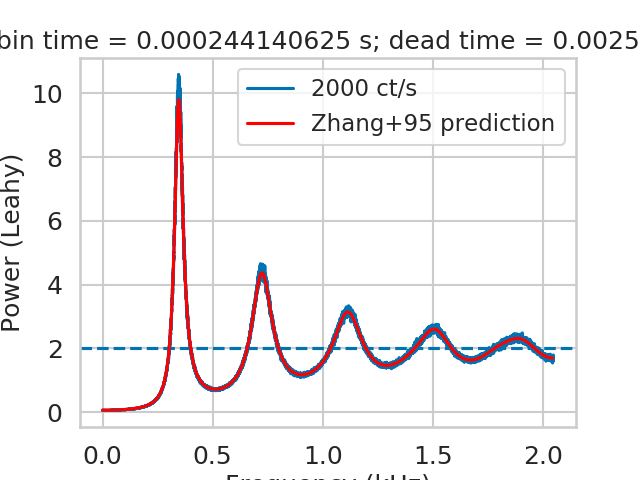

INFO:astropy:filter_for_deadtime: 13333117/16000000 events rejected


INFO: filter_for_deadtime: 13333117/16000000 events rejected [stingray.deadtime.filters]


INFO:astropy:Calculating PDS model (update)


INFO: Calculating PDS model (update) [stingray.deadtime.model]


In [22]:
bintime = 1/4096
deadtime = 2.5e-3
length = 8000
fftlen = 5
r = 2000

plt.figure()

plt.title(f'bin time = {bintime} s; dead time = {deadtime} s')

label = f'{r} ct/s'

events, events_dt = simulate_events(r, length, deadtime=deadtime)
#     lc = Lightcurve.make_lightcurve(events, 1/4096, tstart=0, tseg=length)
lc_dt = Lightcurve.make_lightcurve(events_dt, bintime, tstart=0, tseg=length)
pds = AveragedPowerspectrum(lc_dt, fftlen, norm='leahy')
plt.plot(pds.freq / 1000, pds.power, label=label, drawstyle='steps-mid')

zh_f, zh_p = dz.pds_model_zhang(1000, r, deadtime, bintime, limit_k=250)
plt.plot(zh_f / 1000, zh_p, color='r', label='Zhang+95 prediction', zorder=10)
plt.axhline(2, ls='--')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Power (Leahy)')
plt.legend();

<IPython.core.display.Javascript object>


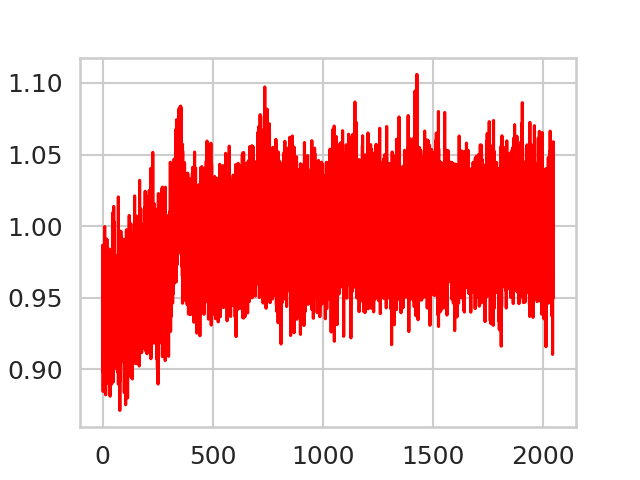

In [23]:
from scipy.interpolate import interp1d

deadtime_fun = interp1d(zh_f, zh_p, bounds_error=False,fill_value="extrapolate")

plt.figure()
plt.plot(pds.freq, pds.power / deadtime_fun(pds.freq), color='r', zorder=10)


Still imperfect, but this is a _very_ high count rate case. In more typical cases, the correction is more than adequate:

<IPython.core.display.Javascript object>


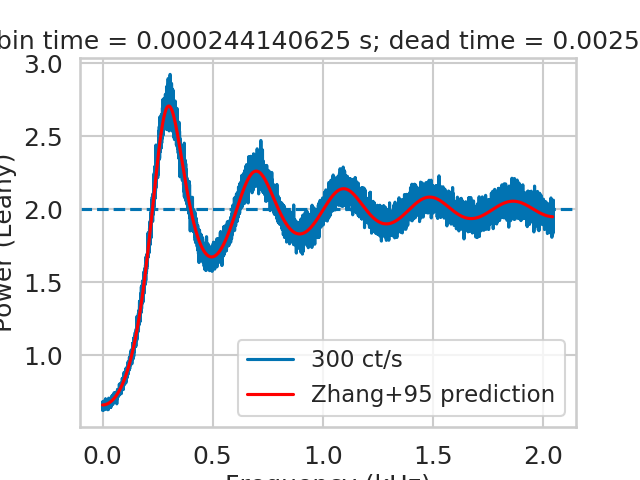

INFO:astropy:filter_for_deadtime: 1029128/2400000 events rejected


INFO: filter_for_deadtime: 1029128/2400000 events rejected [stingray.deadtime.filters]


INFO:astropy:Calculating PDS model (update)


INFO: Calculating PDS model (update) [stingray.deadtime.model]


In [24]:
bintime = 1/4096
deadtime = 2.5e-3
length = 8000
fftlen = 5
r = 300

plt.figure()

plt.title(f'bin time = {bintime} s; dead time = {deadtime} s')

label = f'{r} ct/s'

events, events_dt = simulate_events(r, length, deadtime=deadtime)
#     lc = Lightcurve.make_lightcurve(events, 1/4096, tstart=0, tseg=length)
lc_dt = Lightcurve.make_lightcurve(events_dt, bintime, tstart=0, tseg=length)
pds = AveragedPowerspectrum(lc_dt, fftlen, norm='leahy')
plt.plot(pds.freq / 1000, pds.power, label=label, drawstyle='steps-mid')

zh_f, zh_p = dz.pds_model_zhang(1000, r, deadtime, bintime, limit_k=250)
plt.plot(zh_f / 1000, zh_p, color='r', label='Zhang+95 prediction', zorder=10)
plt.axhline(2, ls='--')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Power (Leahy)')
plt.legend();

<IPython.core.display.Javascript object>


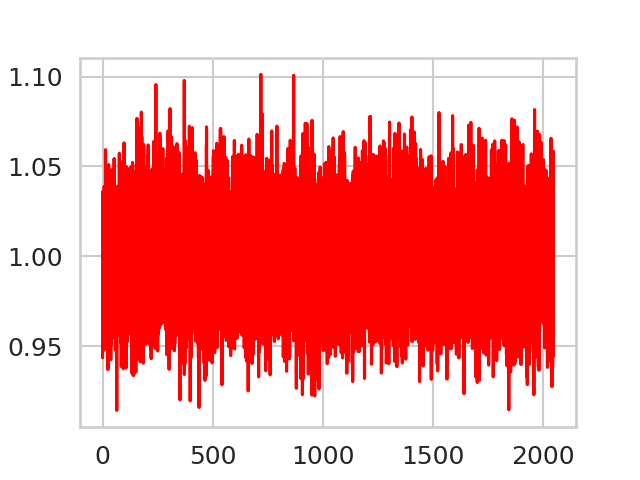

In [25]:
deadtime_fun = interp1d(zh_f, zh_p, bounds_error=False,fill_value="extrapolate")

plt.figure()
plt.plot(pds.freq, pds.power / deadtime_fun(pds.freq), color='r', zorder=10)
